# Лабораторная работа №1: Первичное исследование данных

## 1. Постановка задачи

### Описание датасета
Датасет содержит 1000 наблюдений, данных о качествах сна и образе жизни взрослых людей в возрасте 18–80 лет.

### Условный заказчик
Медицинский исследовательский центр, изучающий влияние образа жизни (курение, употребление алкоголя, физическая активность) на качество сна и риск нарушений (низкая эффективность, преждевременные пробуждения). 

### Возможные задачи ИАД
1. Выявление ключевых факторов образа жизни, ассоциированных с низкой эффективностью сна
2. Понять, как кофе, алкоголь, сигареты и спорт меняют структуру сна — например, уменьшают ли они долю глубокого сна, который важен для восстановления организма.
3. Оценка влияния количества ночных пробуждений ('Awakenings') на общее качество и продолжительность сна

## 2. Паспорт датасета

### Загрузка данных

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# Загрузка данных
df = pd.read_csv('../data/sleep_study_1000.csv')  # Путь к файлу
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()

Размер датасета: 1000 строк, 15 столбцов


,ID,Age,Gender,Bedtime,WakeupTime,SleepDuration,SleepEfficiency,REMSleepPercentage,DeepSleepPercentage,LightSleepPercentage,Awakenings,CaffeineConsumption,AlcoholConsumption,SmokingStatus,ExerciseFrequency
0,1,80,Female,2025-09-30 07:32:17,2025-09-30 13:49:16.669051,6.283241,0.57,15,35,50,0,25.0,1,Yes,1
1,2,24,Male,2025-06-29 20:59:50,2025-06-30 04:09:10.207162,7.155613,0.91,29,68,3,4,50.0,0,No,2
2,3,37,Male,2025-12-24 21:28:32,2025-12-25 03:31:34.257053,6.050627,0.58,15,35,50,3,50.0,0,No,5
3,4,68,Female,2025-02-22 00:25:33,2025-02-22 07:26:37.046703,7.017791,0.88,28,44,28,1,50.0,0,Yes,4
4,5,58,Male,2025-09-02 12:31:53,2025-09-02 21:17:46.256228,8.764793,0.95,28,40,32,4,25.0,4,No,4


### Структура данных

In [9]:
# Информация о столбцах и типах
df.info()

# Статистика по числовым признакам
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    1000 non-null   int64         
 1   Age                   1000 non-null   int64         
 2   Gender                1000 non-null   object        
 3   Bedtime               1000 non-null   datetime64[ns]
 4   WakeupTime            1000 non-null   datetime64[ns]
 5   SleepDuration         1000 non-null   float64       
 6   SleepEfficiency       1000 non-null   float64       
 7   REMSleepPercentage    1000 non-null   int64         
 8   DeepSleepPercentage   1000 non-null   int64         
 9   LightSleepPercentage  1000 non-null   int64         
 10  Awakenings            1000 non-null   int64         
 11  CaffeineConsumption   744 non-null    float64       
 12  AlcoholConsumption    1000 non-null   int64         
 13  SmokingStatus      

,ID,Age,Bedtime,WakeupTime,SleepDuration,SleepEfficiency,REMSleepPercentage,DeepSleepPercentage,LightSleepPercentage,Awakenings,CaffeineConsumption,AlcoholConsumption,ExerciseFrequency,Bedtime_hours,WakeupTime_hours
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,744.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,50.125000,2025-07-14 05:54:22.806000128,2025-07-14 12:56:01.601908224,7.027443,0.720150,22.460000,47.357000,30.183000,2.539000,25.168011,2.560000,2.565000,11.882335,12.021646
min,1.000000,18.000000,2025-01-16 13:58:35,2025-01-16 22:39:02.443537,5.002335,0.500000,15.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.012222,0.009722
25%,250.750000,34.000000,2025-04-15 16:38:04.750000128,2025-04-16 01:10:12.104142336,6.076980,0.610000,18.000000,36.000000,18.000000,1.000000,0.000000,1.000000,1.000000,5.943264,6.199653
50%,500.500000,51.000000,2025-07-12 09:35:16,2025-07-12 16:04:39.844687104,6.981505,0.720000,22.000000,47.000000,30.000000,3.000000,25.000000,3.000000,3.000000,12.080000,12.004444
75%,750.250000,65.000000,2025-10-14 09:24:15.500000,2025-10-14 14:57:31.994626048,8.039587,0.830000,27.000000,59.000000,42.000000,4.000000,50.000000,4.000000,4.000000,17.700139,18.039583
max,1000.000000,80.000000,2026-01-16 13:53:03,2026-01-16 21:01:41.065783,8.998650,0.950000,30.000000,70.000000,59.000000,5.000000,50.000000,5.000000,5.000000,23.996111,23.965833
std,288.819436,18.076397,NaN,NaN,1.135365,0.128139,4.589059,13.097293,13.788968,1.726691,20.446036,1.746267,1.712515,6.905627,6.997054


## 3. Аудит качества данных

### 3.1. Пропуски

In [15]:
# Пропуски по столбцам
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

missing[missing['Пропуски'] > 0]

# Обработка пропусков и замена их медианой
#df['CaffeineConsumption'] = df['CaffeineConsumption'].fillna(df['CaffeineConsumption'].median())
#print(df.isnull().sum())

,Пропуски,Доля (%)
CaffeineConsumption,256,25.6


### 3.2. Дубликаты

In [23]:
duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {duplicates}')

Полных дубликатов строк: 0


### 3.3. Выбросы (пример для одного признака)

Выбросов по методу IQR: 0


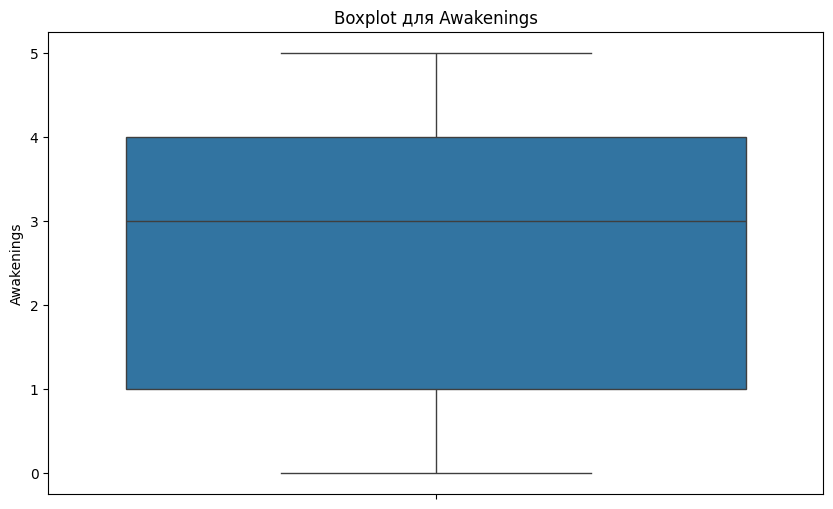

'Большинство людей просыпаются 1–4 раза за ночь, в среднем 3 раза(медиана)'


In [12]:
# 'Awakenings' столбец содержит информацию о кол-вах пробуждений человека за ночь
column = 'Awakenings'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f'Выбросов по методу IQR: {len(outliers)}')

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=column)
plt.title(f'Boxplot для {column}')
plt.show()

# Описание
pprint("Большинство людей просыпаются 1–4 раза за ночь, в среднем 3 раза(медиана)")

## 4. Разведочный анализ (EDA)

### 4.1. Распределение числового признака

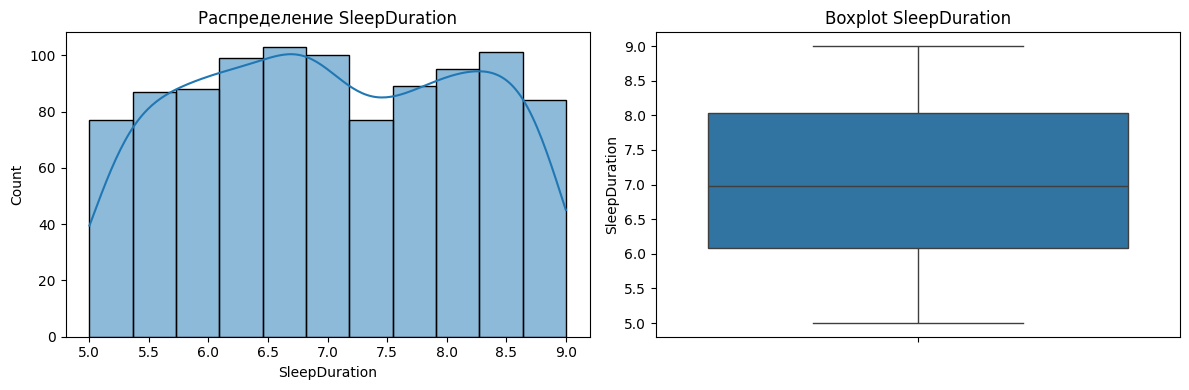

('Большинство людей спят 6–8 часов. Наблюдается небольшой «хвост» влево (менее '
 '6 ч) — возможные случаи недосыпа. Среднее время сна - 7 часов (медиана)')


In [11]:
#df['Bedtime'] = pd.to_datetime(df['Bedtime'], errors='coerce')
#df['WakeupTime'] = pd.to_datetime(df['WakeupTime'], errors='coerce')
#def time_to_hours(dt_series):
#    return dt_series.dt.hour + dt_series.dt.minute / 60 + dt_series.dt.second / 3600

#df['Bedtime_hours'] = time_to_hours(df['Bedtime'])
#df['WakeupTime_hours'] = time_to_hours(df['WakeupTime'])

# 'SleepDuration' столбец содержит информацию о длительности сна
numeric_col = 'SleepDuration'

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_col], kde=True)
plt.title(f'Распределение {numeric_col}')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[numeric_col])
plt.title(f'Boxplot {numeric_col}')
plt.tight_layout()
plt.show()

# Описание
pprint("Большинство людей спят 6–8 часов. Наблюдается небольшой «хвост» влево (менее 6 ч) — возможные случаи недосыпа. Среднее время сна - 7 часов (медиана)")

### 4.2. Анализ категориального признака

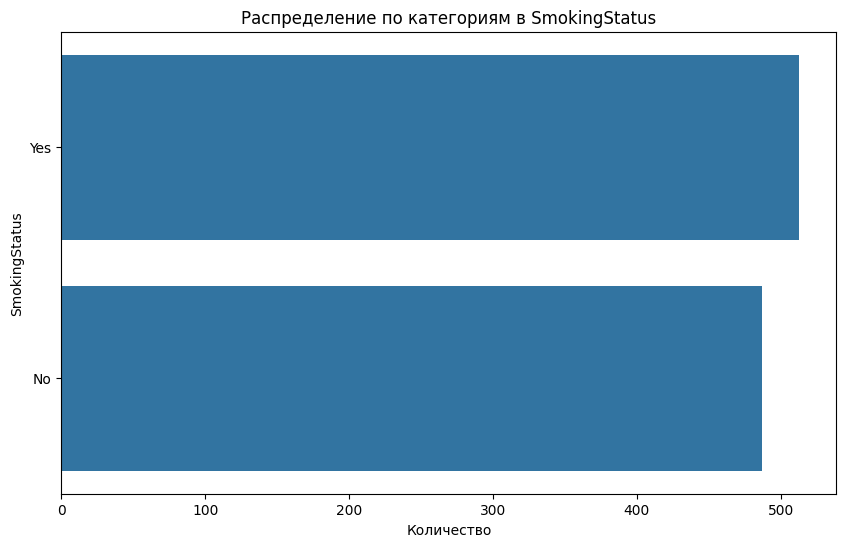

('Небольшое превосходство курящих указывает на потенциальную потребность в '
 'учёте этого фактора при анализе сна, особенно учитывая, что курение может '
 'влиять на качество сна.')


In [4]:
# 'SmokingStatus' столбец показывает, курит участник исследования или нет.
cat_col = 'SmokingStatus'

# Визуализация
plt.figure(figsize=(10, 6))
top_categories = df[cat_col].value_counts()
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f'Распределение по категориям в {cat_col}')
plt.xlabel('Количество')
plt.show()

# Описание
pprint("Небольшое превосходство курящих указывает на потенциальную потребность в учёте этого фактора при анализе сна, особенно учитывая, что курение может влиять на качество сна.")


## 5. Выводы

Детали в файле `report/quality_report.md`